In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

day_ahead = pd.read_csv('data/Day Ahead Auction Prices.csv')
day_ahead['Date'] = pd.to_datetime(day_ahead['Date'])
day_ahead.columns = ['ds','y']
day_ahead.head()

,ds,y
0,2016-01-01 00:00:00,23.86
1,2016-01-01 01:00:00,22.39
2,2016-01-01 02:00:00,20.59
3,2016-01-01 03:00:00,16.81
4,2016-01-01 04:00:00,17.41


/Users/adrianscholl/LRZ Sync+Share/Projects/FORRS-PFC-1/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
14:41:20 - cmdstanpy - INFO - Chain [1] start processing
14:41:28 - cmdstanpy - INFO - Chain [1] done processing


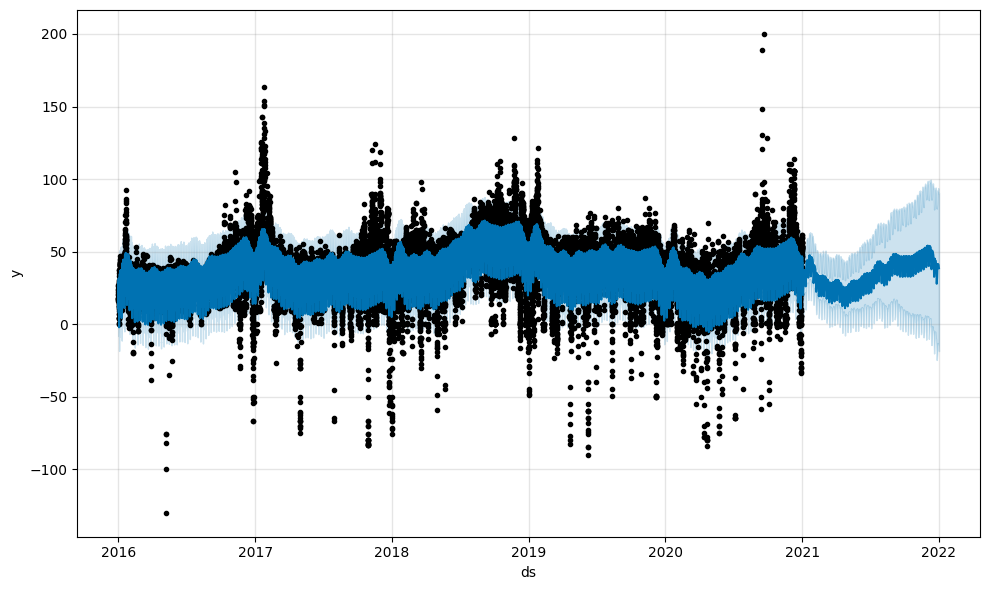

In [2]:
from prophet import Prophet

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='additive')

#only fit until 2021
model.fit(day_ahead.loc[day_ahead['ds'] < '2021-01-01'])

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

fig = model.plot(forecast)
plt.show()

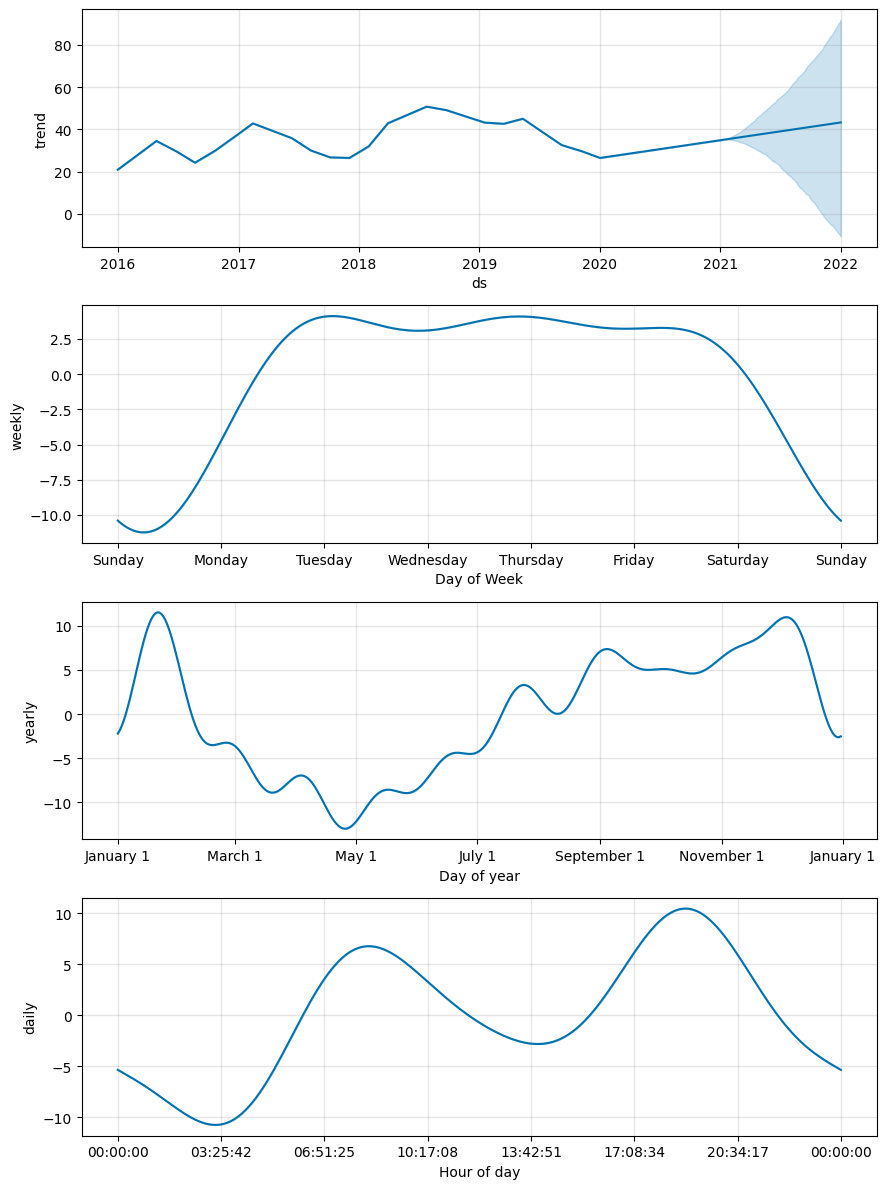

In [3]:
fig2 = model.plot_components(forecast)